# Algorithms

Study and comparison of different techniques and clustering algorithms.

In [1]:
# Libraries
import pandas as pd
import numpy as np
import json

from pickle import dump #  To save and read binaries of models and scalers 

# for K approximations:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans

# DBSCAN:
from sklearn.cluster import DBSCAN


# visualization imports
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df_movies = pd.read_json('Data/datasets/vectorized/movies_vectorized_25.json', orient='records')

# Content-based approach

## KNN

### Rudimentary KNN

In [3]:
km_movies_basic = KMeans(n_clusters=15, random_state=0)

In [4]:
km_movies_basic.fit(df_movies)

KMeans(n_clusters=15, random_state=0)

### KNN with K approximation

Different methods that the literature suggest will be used.


#### Elbow Method 

A more rudimentary method, [explanation]...

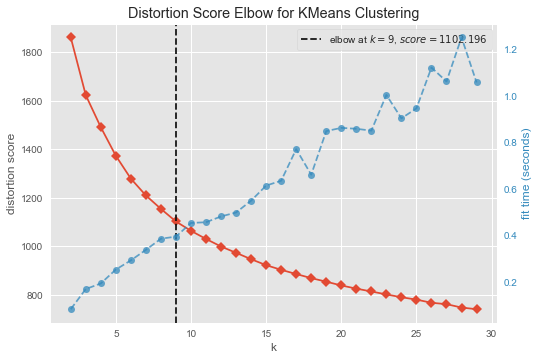

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
model_1 = KMeans(
    n_init = 20,
    algorithm = 'elkan',
)
visualizer = KElbowVisualizer(
    model_1,
    k=(2,30),                       # k is range of number of clusters.
    timings= True
    )

visualizer.fit(df_movies)                   # Fit data to visualizer
visualizer.show()                   # Finalize and render the figure

#### Silhouette score method

Calculates the mean Silhouette Coefficient of all samples.

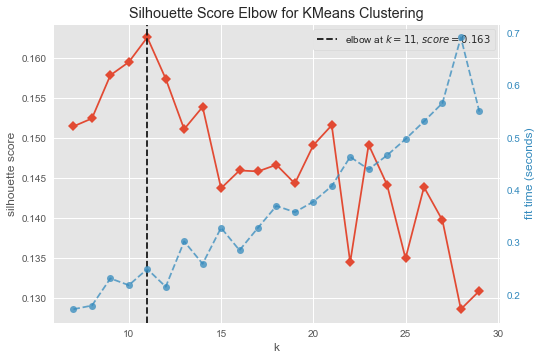

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [24]:
model_2 = KMeans()

visualizer = KElbowVisualizer(
    model_2,
    k=(7,30),                   # k is range of number of clusters.
    metric = 'silhouette',      # 2nd method to approximate K.
    timings=True
    )

visualizer.fit(df_movies)       # Fit the data to the visualizer
visualizer.show()               # Finalize and render the figure

In [25]:
visualizer.elbow_value_

11

#### Calinski Harabasz method

Computes the ratio of dispersion between and within clusters

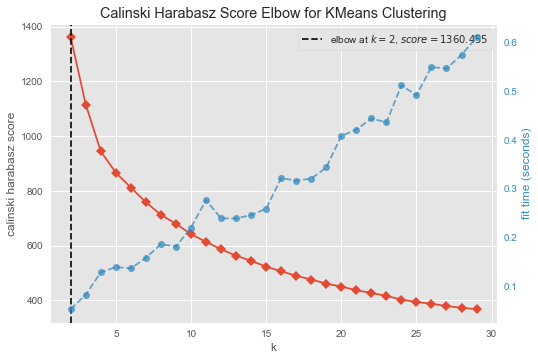

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [8]:
model_3 = KMeans()

visualizer = KElbowVisualizer(
    model_3,
    k=(2,30),                           # k is range of number of clusters.
    metric = 'calinski_harabasz',       # 3rd method to approximate K.
    timings=True
    )

visualizer.fit(df_movies)               # Fit the data to the visualizer
visualizer.show()               # Finalize and render the figure


## DBSCAN

In [172]:
model = DBSCAN(eps=0.5, min_samples=60)

l  = model.fit_predict(df_movies)

metrics.silhouette_score(df_movies, l)


0.23315372534932124

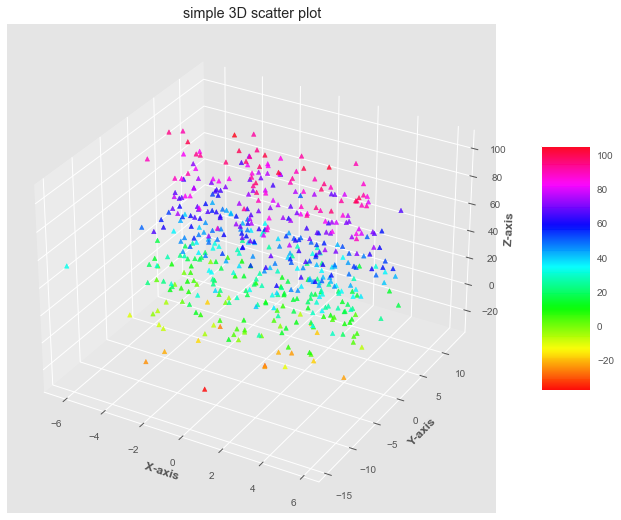

In [180]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

z = 4 * np.tan(np.random.randint(10, size =(500))) + np.random.randint(100, size =(500))
x = 4 * np.cos(z) + np.random.normal(size = 500)
y = 4 * np.sin(z) + 4 * np.random.normal(size = 500)
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

## Hierarchical clustering

## Benchmarking

In [87]:
import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### KMeans

In [116]:
# Define dataframe:
df_kmeans = pd.DataFrame(
    columns = [
        'Initialization',           # K-means++ or random.
        'K-approximation method',   # Elbow or silhouette
        'Number of clusters',       # Number of clusters suggested by the approximation method
        'Inertia',                  # Or within-cluster sum-of-squares. The lower, the better.
        'Silhouette score',         # Instrinsic method to evaluate quality of cluster. 
        'Fit time'
    ]
)

In [117]:
# Function to obtain K approximation.

def calculate_elbow(model, data):
    visualizer = KElbowVisualizer(
        model_2,
        k=(2,30),                   # k is range of number of clusters.
        timings=True
    )

    visualizer.fit(data)            # Fit the data to the visualizer

    return visualizer.elbow_value_

def calculate_silhouette(model, data):
    visualizer = KElbowVisualizer(
        model_2,
        k=(7,30),                   # k is range of number of clusters.
        metric = 'silhouette',      # 2nd method to approximate K.
        timings=True
    )

    visualizer.fit(data)            # Fit the data to the visualizer

    return visualizer.elbow_value_

In [118]:
# Define benckmarking function for KMeans

def benchmark_k_means(model, data):
    """
    Benchmark to evaluate KMeans initialization methods.

    Parameters
    ----------
    model : KMeans instance
    data : data to cluster.

    Returns
    -------
    results : dictionary with structure
        {
            'fit_time' : ,
            'inertia' : ,
            'silhouette'
        }

    """
    t0 = time.time()
    estimator = make_pipeline(StandardScaler(), model).fit(data)
    fit_time = time.time() - t0

    results = {}
    results['Fit time'] = fit_time
    results['Inertia'] = estimator[-1].inertia_

    # The silhouette score requires the full dataset
    results['Silhouette score'] = metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
            )

    return results

#### K-means++

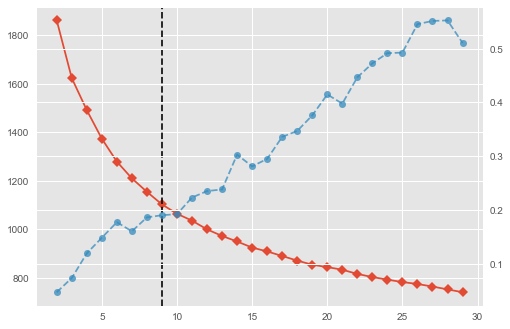

In [119]:
# We'll start with k-means++ initialization method (default method)
model = KMeans(
    init='k-means++',
    algorithm='elkan'
)

model.n_clusters = calculate_elbow(model, df_movies)

d = {
    'Initialization' : model.init,
    'K-approximation method' : 'elbow',
    'Number of clusters' : model.n_clusters
}

results = {**d, **benchmark_k_means(model, df_movies) } # Merges the 2 dictionaries.

df_kmeans = df_kmeans.append(results, ignore_index=True)

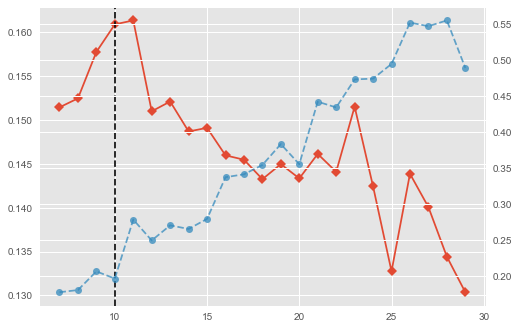

In [120]:
# We'll start with k-means++ initialization method (default method)
model = KMeans(
    init='k-means++',
    algorithm='elkan'
)

model.n_clusters = calculate_silhouette(model, df_movies)

d = {
    'Initialization' : model.init,
    'K-approximation method' : 'silhouette',
    'Number of clusters' : model.n_clusters
}

results = {**d, **benchmark_k_means(model, df_movies) } # Merges the 2 dictionaries.

df_kmeans = df_kmeans.append(results, ignore_index=True)

#### Random

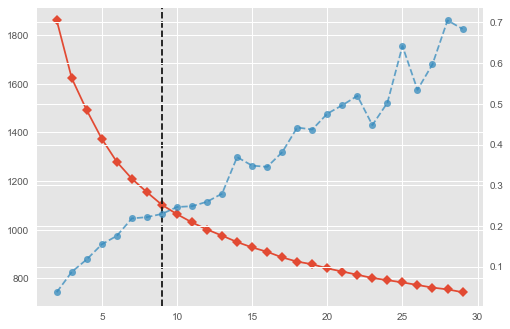

In [121]:
# We'll start with k-means++ initialization method (default method)
model = KMeans(
    init='random',
    algorithm='elkan'
)

model.n_clusters = calculate_elbow(model, df_movies)

d = {
    'Initialization' : model.init,
    'K-approximation method' : 'elbow',
    'Number of clusters' : model.n_clusters
}

results = {**d, **benchmark_k_means(model, df_movies) } # Merges the 2 dictionaries.

df_kmeans = df_kmeans.append(results, ignore_index=True)

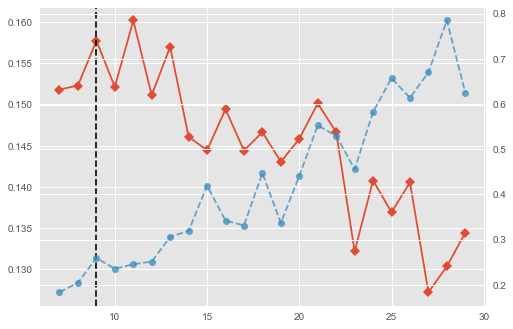

In [122]:
# We'll start with k-means++ initialization method (default method)
model = KMeans(
    init='random',
    algorithm='elkan',
)

model.n_clusters = calculate_silhouette(model, df_movies)

d = {
    'Initialization' : model.init,
    'K-approximation method' : 'silhouette',
    'Number of clusters' : model.n_clusters
}

results = {**d, **benchmark_k_means(model, df_movies) } # Merges the 2 dictionaries.

df_kmeans = df_kmeans.append(results, ignore_index=True)

In [123]:
df_kmeans

,Initialization,K-approximation method,Number of clusters,Inertia,Silhouette score,Fit time
0,k-means++,elbow,9,25783.185089,0.104591,0.224400
1,k-means++,silhouette,10,24989.545393,0.110361,0.275235
2,random,elbow,9,25863.952879,0.093286,0.237365
3,random,silhouette,9,25938.884499,0.118940,0.263296


### DBSCAN

For this benckmark, different combinations of epsilon and min_samples are used for the measurement of the Silhouette score.

In [211]:
arr_eps = []
arr_sam = []
arr_sil = []

min_eps = 0.3
max_eps = 1

min_samples = 5
max_samples = 100

total_samples = 0
# Initial loop.
try:
    for eps in np.arange(min_eps, max_eps, 0.1):            # arrange used for float steps
        for sam in range(min_samples, max_samples, min_samples):
            model = DBSCAN(eps=eps, min_samples=sam)
            l  = model.fit_predict(df_movies)
            sil = metrics.silhouette_score(df_movies, l)

            arr_eps.append(eps)
            arr_sam.append(sam)
            arr_sil.append(sil)
except:
    print(f"Error with values: eps: {eps}, sam: {sam}.")

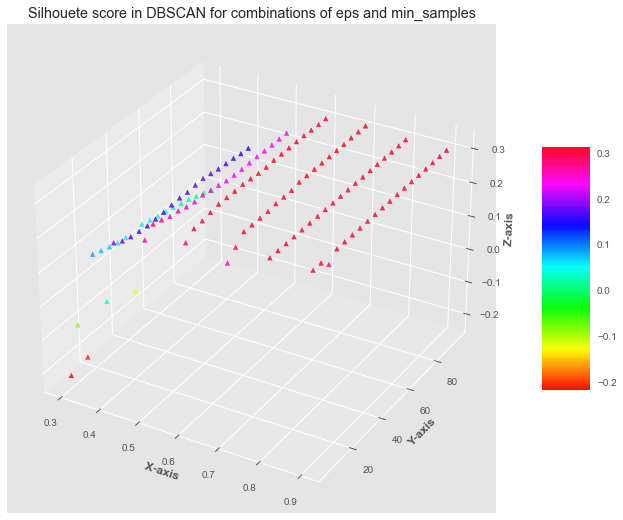

In [212]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

z = arr_sil
x = arr_eps
y = arr_sam
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = z,
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("Silhouete score in DBSCAN for combinations of eps and min_samples")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

In [213]:
best_config = {
    'eps': arr_eps[np.argmax(arr_sil)],
    'sam': arr_sam[np.argmax(arr_sil)]
}

In [214]:
best_config

{'eps': 0.7000000000000002, 'sam': 85}

# Collaborative filtering approach

The collaborative approach (or collaborative filtering approach) may
consider a user’s social environment. It recommends items based on the opinions of
other customers who have similar tastes or preferences as the user. 

## test

# Hybrid approach

Combines both content-based and collaborative methods.

---